# **Sprint7 クラスタリング**

## **K-meansスクラッチ**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)


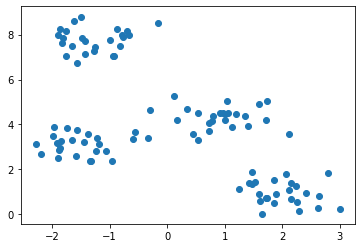

In [7]:
plt.scatter(X[:, 0], X[:, 1])
plt.show();

### **【問題1】中心点の初期値を決める**

In [3]:
def initial_centroid(X, n_clusters):
    X_initial_indexes = np.arange(X.shape[0])
    initial_centroid_indexes = np.random.permutation(X_initial_indexes)[:n_clusters]
    centroid_centers_ = X[initial_centroid_indexes]
    
    return centroid_centers_

In [8]:
initial_centroid(X, 4)

array([[-1.61803727,  8.60696731],
       [-1.7653772 ,  8.17625727],
       [ 1.74265969,  5.03846671],
       [ 0.4519936 ,  3.59377836]])

### **【問題2】SSEを求める関数の作成**

In [10]:
def distance(x, y):
    return np.sum((x - y)**2)

In [29]:
X = np.array([[1, 1], [1, 2], [2, 2], [4, 5], [5, 4]])
initial = np.array([[1, 1.1], [1, 2.1]])

In [26]:
pred = np.zeros(X.shape[0])

new_pred = np.array([
    np.array([
        distance(x, centroid) 
        for centroid in initial
    ]).argmin() 
    for x in X
])

sumsum = np.array([
    np.array([
        distance(x, centroid) 
        for centroid in initial
    ]) 
    for x in X
])

ssejr = np.array([
    np.array([
        distance(x, centroid) 
        for centroid in initial
    ]).min() 
    for x in X
])

print(new_pred)
print(sumsum)
print(ssejr)
print(ssejr.sum())

[0 1 1 1 1]
[[1.000e-02 1.210e+00]
 [8.100e-01 1.000e-02]
 [1.810e+00 1.010e+00]
 [2.421e+01 1.741e+01]
 [2.441e+01 1.961e+01]]
[1.000e-02 1.000e-02 1.010e+00 1.741e+01 1.961e+01]
38.05


In [30]:
def sse(X, n_clusters):
    centroid_centers_ = initial_centroid(X, n_clusters)
    sse_min_point = np.array([
        np.array([
            distance(x, centroid) 
            for centroid in centroid_centers_
        ]).min() 
        for x in X
    ])
    sse = sse_min_point.sum()
    
    return sse

In [31]:
sse(X, 2)

39

### **【問題3】クラスタへの割り当て**

In [32]:
def cluster_assignment(X, n_clusters):
    centroid_centers_ = initial_centroid(X, n_clusters)
    pred = np.array([
        np.array([
            distance(x, centroid) 
            for centroid in centroid_centers_
        ]).argmin() 
        for x in X
    ])
    
    return pred

In [33]:
cluster_assignment(X, 2)

array([1, 1, 1, 0, 0])

### **【問題4】中心点の移動**

In [35]:
def move_center(X, n_clusters):
    pred = cluster_assignment(X, n_clusters)
    centroid_centers_ = np.array(X[pred == i].mean(axis=0) for i in n_clusters)
    return centroid_centers_

### **【問題5】繰り返し**

In [43]:
class ScratchKMeans():
    
    def __init__(self, n_clusters, max_iter, verbose=False):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.cluster_centers_ = None
        
    def fit(self, X):
        X_initial_indexes = np.arange(X.shape[0])
        initial_centroid_indexes = np.random.permutation(X_initial_indexes)[:self.n_clusters]
        self.cluster_centers_ = X[initial_centroid_indexes]
        
        pred = np.zeros(X.shape[0])
        
        # sse_min = []
        for _ in range(self.max_iter):
            new_pred = np.array([
                np.array([
                    self._distance(x, centroid) for centroid in self.cluster_centers_
                ]).argmin() for x in X
            ])
            
            if np.all(new_pred == pred):
                break
            
            pred = new_pred
            self.cluster_centers_ = np.array([X[pred == i].mean(axis=0) for i in range(self.n_clusters)])
            
            # sse_list = sse_min.append(sse_min_point.sum())
            # sse_array = np.array(sse_list)
            
            # if self.verbose:
                # print(sse_array)
                
        return pred
    
    def _distance(self, x, y):
        return np.sum((x - y)**2)

### **【問題6】異なる初期値で計算**

In [110]:
X = np.array([[1, 1], [1, 2], [2, 2], [4, 5], [5, 4]])
cluster_centers_ = np.array([[1, 1.1], [1, 2.1]])

fai = []
# y = 100
g = np.zeros(5)
for _ in range(5):
    h = np.array([
        np.array([
            distance(x, centroid) for centroid in cluster_centers_
        ]).min() for x in X
    ])
    
    new_g = np.array([
        np.array([
            distance(x, centroid) for centroid in cluster_centers_
        ]).argmin() for x in X
    ])
    
    new_y = h.sum()
    y = new_y
    g = new_g
    cluster_centers_ = np.array([X[g == i].mean(axis=0) for i in range(2)])
    fai.append(y)
    
fai

[38.05, 11.625, 2.333333333333333, 2.333333333333333, 2.333333333333333]

In [294]:
class ScratchKMeans():
    
    def __init__(self, n_clusters, max_iter, n_init, verbose=False):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.n_init = n_init
        self.cluster_centers_ = None
        self.verbose = verbose
        self.sse = None
        
    def fit(self, X):
        for _ in range(self.n_init):
            X_initial_indexes = np.arange(X.shape[0])
            np.random.seed(0)
            initial_centroid_indexes = np.random.permutation(X_initial_indexes)[:self.n_clusters]
            self.cluster_centers_ = X[initial_centroid_indexes]
        
        pred = np.zeros(X.shape[0])
        sse_list = []
        for _ in range(self.max_iter):
            sse_min_point = np.array([
                np.array([
                    self._distance(x, centroid) for centroid in self.cluster_centers_
                ]).min() for x in X
            ])
            
            new_pred = np.array([
                np.array([
                    self._distance(x, centroid) for centroid in self.cluster_centers_
                ]).argmin() for x in X
            ])
            
            if np.all(new_pred == pred):
                break
            
            new_sse = sse_min_point.sum()
            self.sse = new_sse
            pred = new_pred
            self.cluster_centers_ = np.array([X[pred == i].mean(axis=0) for i in range(self.n_clusters)])
            
            sse_list.append(self.sse)
            sse_array = np.array(sse_list)
            
            if self.verbose:
                print(sse_array)
                
        return pred
    
    def _distance(self, x, y):
        return np.sum((x - y)**2)

### **【問題7】推定**

In [295]:
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)

In [296]:
X_initial_indexes = np.arange(X.shape[0])
np.random.seed(0)
initial_centroid_indexes = np.random.permutation(X_initial_indexes)[:4]
cluster_centers_ = X[initial_centroid_indexes]
cluster_centers_

array([[-0.565433  ,  3.65813966],
       [ 1.60161834,  0.92363636],
       [ 1.35678894,  4.36462484],
       [-1.26041884,  7.46644456]])

In [297]:
skmeans = ScratchKMeans(n_clusters=4, n_init=10, max_iter=500)
pred = skmeans.fit(X)
pred

array([2, 3, 2, 2, 2, 2, 0, 3, 2, 3, 3, 3, 3, 3, 3, 1, 1, 0, 0, 1, 2, 3,
       0, 1, 2, 0, 0, 2, 1, 1, 1, 3, 1, 1, 0, 2, 3, 1, 3, 0, 2, 0, 3, 0,
       0, 3, 1, 0, 2, 2, 2, 1, 0, 0, 0, 3, 3, 1, 1, 3, 3, 1, 1, 2, 1, 3,
       0, 0, 1, 2, 3, 1, 2, 3, 2, 2, 0, 0, 1, 1, 1, 3, 0, 2, 1, 0, 1, 1,
       2, 2, 2, 0, 2, 0, 0, 3, 3, 0, 3, 2])

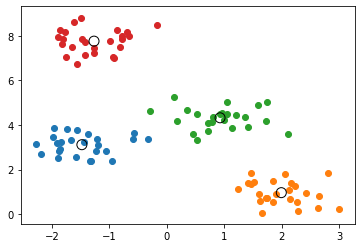

In [298]:
for i in range(4):
    labels = X[pred == i]
    plt.scatter(labels[:, 0], labels[:, 1])
    
centers = skmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], s=100, 
           facecolors='none', edgecolors='k')
plt.show();

### **【問題8】エルボー法の実装**

In [299]:
cluster = skmeans.sse
# k_cluster = np.arange(len(sse_array))
cluster

50.912773104155825

In [301]:
cluster_box = []
for k in range(2, 10):
    kmeans_k = ScratchKMeans(n_clusters=k, n_init=10, max_iter=10)
    kmeans_k.fit(X)
    cluster_box.append(kmeans_k.sse)
    
# kmeans_5 = ScratchKMeans(n_clusters=4, max_iter=500)
# kmeans_5.fit(X)
# kmeans_5.sse

cluster_box

[425.1723693454042,
 179.934528770763,
 50.912773104155825,
 44.99509869935799,
 55.06973298301604,
 35.54279986395147,
 30.875942634564957,
 27.38167237239971]

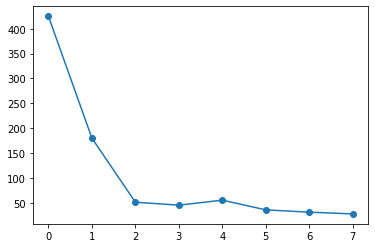

In [302]:
plt.plot(cluster_box, marker='o')
plt.show();

### **【問題9】(アドバンス課題)シルエット図**

In [183]:
dist = []
for i in range(4):
    dist.append(np.sum((X[1] - centers[i])**2))
dist.index(min(dist))

2

In [193]:
idx = []
for i in range(len(X)):
    dist = []
    for j in range(4):
        dist.append(np.sum((X[i] - centers[j])**2))
    idx.append(dist.index(min(dist)))
label_array = np.array(idx)
print(label_array)
print(len(X[label_array == 0]))

[0 2 0 0 0 0 3 2 0 2 2 2 2 2 2 1 1 3 3 1 0 2 3 1 0 3 3 0 1 1 1 2 1 1 3 0 2
 1 2 3 0 3 2 3 3 2 1 3 0 0 0 1 3 3 3 2 2 1 1 2 2 1 1 0 1 2 3 3 1 0 2 1 0 2
 0 0 3 3 1 1 1 2 3 0 1 3 1 1 0 0 0 3 0 3 3 2 2 3 2 0]
25


In [231]:
label_0 = np.where(pred == 0)
for i in label_0:
    a_0d = np.sum((X[0] - X[i])**2)
a_0 = a_0d**0.5 / len(label_0)
print('a_0 :', a_0)

for i in label_0:
    a_1d = np.sum((X[2] - X[i])**2)
a_1 = a_1d**0.5 / len(label_0)
print('a_1 :', a_1)


# for i in label_0:
for i in label_0:
    a_0d = np.sum((X[0] - X[i])**2)
a_0 = a_0d**0.5 / len(label_0)
print(a_0)


# for i in [1, 2, 3]:
#     for j in [1, 2, 3, 4, 5]:
#         p = i * j
#         print(p)

a_0 : 4.844117667240773
a_1 : 4.213997209952067
4.844117667240773


In [305]:
label_0 = np.array(np.where(pred == 0))
# for i in label_0:
#     a_0d = np.sum((X[0] - X[i])**2)
#print(a_0d**0.5 / 25)
#print(label_0)
lst0 = []
for i in list(label_0):
    j = i
# print(j)
fai0 = []
for k in j:
    fai0.append(k)

# box = []
# for i in fai:
#     for j in fai:
#         a_jd = np.sum((X[j] - X[i])**2)
#     box.append(a_jd)
# print(sum(box)/len(fai))

box0 = []
for i in fai0:
    for j in fai0:
        a_jd = np.sum((X[j] - X[i])**2)
    box.append(a_jd**0.5)
print(sum(box0)/len(fai0))



0.0


In [136]:
from matplotlib import cm

cluster_labels = [i for i in range(3)]
n_clusters = 3
y_km = pred
silhouette_vals = 
silhouette_avg = 

y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)

plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

## **クラスタ分析**

### **【問題10】クラスタ数kの選択**

In [453]:
import pandas as pd

df = pd.read_csv('Wholesale customers data.csv')

In [399]:
df.head()
ch1 = df[df['Channel'] == 1].index
ch2 = df[df['Channel'] == 2].index
ch_1 = np.array(ch1)
ch_2 = np.array(ch2)
reg1 = df[df['Region'] == 1].index
reg2 = df[df['Region'] == 2].index
reg3 = df[df['Region'] == 3].index
reg_1 = np.array(reg1)
reg_2 = np.array(reg2)
reg_3 = np.array(reg3)
print(ch_1)

[  3   8  15  17  19  21  22  26  27  29  30  31  32  33  34  36  39  40
  41  50  51  54  55  58  59  64  66  68  69  70  71  72  75  76  78  79
  80  83  87  88  89  90  91  93  95  97  98  99 103 104 105 110 112 113
 114 115 116 117 118 119 120 121 122 124 125 126 128 129 130 131 132 133
 134 135 136 137 138 139 140 141 142 143 144 146 147 148 149 150 151 152
 153 154 157 161 162 167 168 169 172 174 176 177 178 179 180 181 182 183
 184 185 186 187 190 191 192 194 195 196 198 199 202 203 204 206 208 210
 212 213 215 217 219 220 221 222 224 225 227 228 229 231 232 233 234 235
 236 237 238 239 240 241 242 243 244 246 247 248 249 250 252 253 254 255
 256 257 258 259 260 261 262 263 265 267 269 270 271 272 273 274 275 276
 277 278 280 282 283 284 285 286 287 288 289 290 291 292 294 296 299 307
 308 310 311 313 314 316 317 318 320 321 322 323 324 325 326 327 328 329
 330 332 336 337 338 339 342 344 345 348 350 352 354 355 356 358 359 360
 361 362 363 364 366 367 368 369 371 372 374 375 37

In [400]:
df = df.drop(['Channel', 'Region'], axis=1)
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [417]:
# 標準化
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df)
df_sc = scaler.transform(df)

In [418]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca = pca.fit(df_sc)
data_pca = pca.transform(df_sc)
X = np.array(data_pca)

[0.45961362 0.86478588 0.93481597 0.97883941 0.99386152 1.        ]


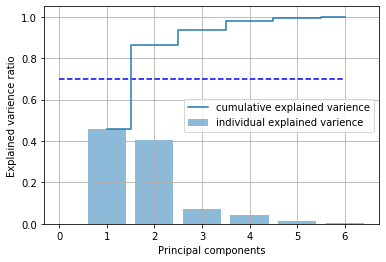

In [419]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=None)
pca = pca.fit(df)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
print(cum_var_exp)
plt.bar(range(1, 7), var_exp, alpha=0.5, align='center', label='individual explained varience')
plt.step(range(1, 7), cum_var_exp, where='mid', label='cumulative explained varience')
plt.ylabel('Explained varience ratio')
plt.xlabel('Principal components')
plt.hlines(0.7, 0, 6, 'blue', linestyles='dashed')
plt.legend(loc='best')
plt.grid()
plt.show()

In [420]:
cluster_box2 = []
for j in range(2, 30):
    kmeans_j = ScratchKMeans(n_clusters=j, n_init=10, max_iter=10)
    kmeans_j.fit(X)
    cluster_box2.append(kmeans_j.sse)
    
# kmeans_5 = ScratchKMeans(n_clusters=4, max_iter=500)
# kmeans_5.fit(X)
# kmeans_5.sse

cluster_box2

[1228.6214131743043,
 978.4796201401678,
 682.7439877324102,
 600.7476097951101,
 358.7934055497392,
 321.23532838268045,
 293.9662718532853,
 234.64081275674005,
 217.2739736027868,
 206.78634908757726,
 191.30772986902394,
 186.49183979607545,
 170.82670883193677,
 171.46534371626336,
 169.6208980943159,
 159.75688774576258,
 157.96383721646714,
 161.12455125338266,
 150.61688134659192,
 153.59699450173613,
 139.17383929607837,
 137.70624216579273,
 136.81373933670426,
 135.11800280502447,
 134.47152623245412,
 132.45760090710525,
 131.53062288778423,
 130.08677832046425]

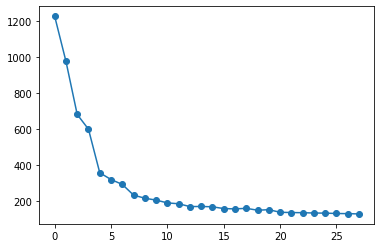

In [421]:
plt.plot(cluster_box2, marker='o')
plt.show();

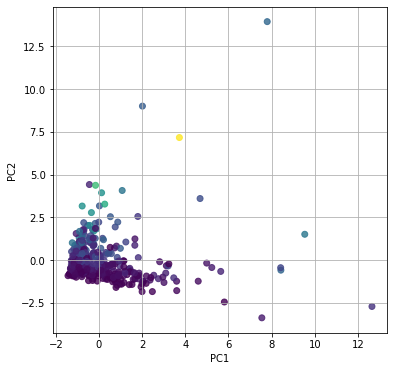

In [422]:
plt.figure(figsize=(6, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], alpha=0.8, c=list(df.iloc[:, 0]))
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [423]:
data_pca

array([[ 1.93290546e-01, -3.05099963e-01],
       [ 4.34419896e-01, -3.28412623e-01],
       [ 8.11143234e-01,  8.15095701e-01],
       [-7.78647832e-01,  6.52753734e-01],
       [ 1.66287259e-01,  1.27143372e+00],
       [-1.56169932e-01, -2.95140988e-01],
       [-3.35288404e-01, -5.25003258e-01],
       [ 1.40586434e-01, -2.30992687e-01],
       [-5.17319541e-01, -6.59362827e-01],
       [ 1.59210908e+00, -7.41011332e-01],
       [ 6.38085945e-01, -4.01825201e-01],
       [-9.27692579e-01, -2.19287242e-01],
       [ 9.91362176e-01,  6.85910808e-01],
       [ 8.50246760e-01, -8.56919642e-02],
       [ 8.45043794e-01,  1.54724325e-01],
       [-9.51585375e-01, -4.95908498e-01],
       [ 5.57558717e-01, -1.02612272e+00],
       [-3.52538598e-01,  2.07075910e-01],
       [ 3.16578563e-01,  4.42066292e-01],
       [-3.23755737e-01, -7.03586946e-01],
       [-3.20000597e-01,  1.56628147e-01],
       [-1.11844720e+00, -2.30527519e-01],
       [-1.76694545e-01,  2.14371699e+00],
       [ 4.

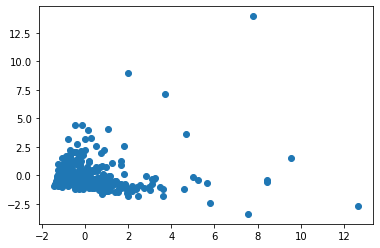

In [424]:
plt.scatter(X[:, 0], X[:, 1])
plt.show();

In [425]:
skmeans_2 = ScratchKMeans(n_clusters=2, n_init=10, max_iter=500)
pred2 = skmeans_2.fit(X)
pred2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

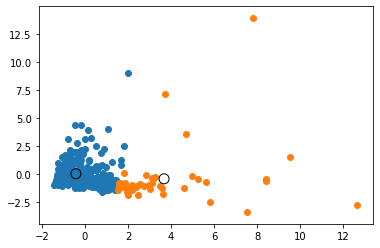

In [426]:
for i in range(2):
    labels2 = X[pred2 == i]
    plt.scatter(labels2[:, 0], labels2[:, 1])
    
centers2 = skmeans_2.cluster_centers_
plt.scatter(centers2[:, 0], centers2[:, 1], s=100, 
           facecolors='none', edgecolors='k')
plt.show();

In [427]:
skmeans_3 = ScratchKMeans(n_clusters=3, n_init=10, max_iter=500)
pred3 = skmeans_3.fit(X)
pred3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2,
       0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

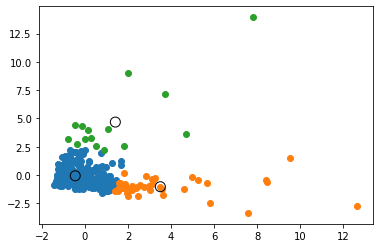

In [428]:
for i in range(3):
    labels3 = X[pred3 == i]
    plt.scatter(labels3[:, 0], labels3[:, 1])
    
centers3 = skmeans_3.cluster_centers_
plt.scatter(centers3[:, 0], centers3[:, 1], s=100, 
           facecolors='none', edgecolors='k')
plt.show();

**選んだクラスタ数は3である。まず1点目の理由としては、SSEとクラスタ数との関係を表したグラフから探るエルボー法による理解。SSEが収束しつつあるのはクラスタ数が20を超えたあたりであるが、これでは妥当な分類とは言えない。そこで初期値からどのくらい下がっているかを観察した結果、クラスタ数3で当初の30%ほどに減少していることからも妥当と考えた。また第二に、実際にクラスタ3のk-means法でクラスタリングを行った結果を可視化したところ、「両特徴量ともに小さな領域」、「どちらか一方が小さく、他方が大きい領域」の3つに分けることは特段の不自然性がないと考えた。以上から、クラスタ数3を妥当とした。**

### **【問題11】既知のグループとの比較**

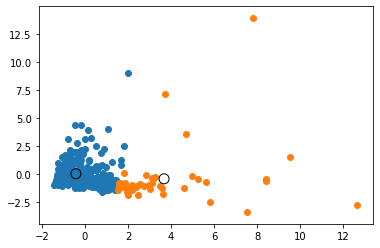

In [429]:
for i in range(2):
    labels2 = X[pred2 == i]
    plt.scatter(labels2[:, 0], labels2[:, 1])
    
centers2 = skmeans_2.cluster_centers_
plt.scatter(centers2[:, 0], centers2[:, 1], s=100, 
           facecolors='none', edgecolors='k')
plt.show();

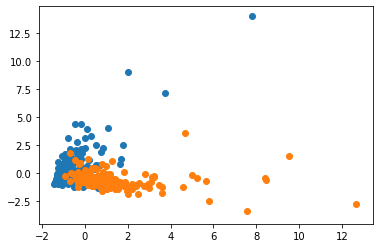

In [430]:
plt.scatter(X[ch_1, 0], X[ch_1, 1])
plt.scatter(X[ch_2, 0], X[ch_2, 1])
plt.show();

**Channelによる分類はかなり重なりが大きい。一方、k-means法によるクラスタリングは綺麗に分かれるという特徴がある。どちらかが「金科玉条」というわけではないが、今回はChannelによる分類が重複部分が大きすぎるため、k-means法によるクラスタリングが好ましいと感じる。ただ、こちらも、境界がはっきりしているという難点もある。**

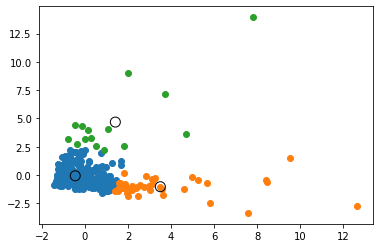

In [431]:
for i in range(3):
    labels3 = X[pred3 == i]
    plt.scatter(labels3[:, 0], labels3[:, 1])
    
centers3 = skmeans_3.cluster_centers_
plt.scatter(centers3[:, 0], centers3[:, 1], s=100, 
           facecolors='none', edgecolors='k')
plt.show();

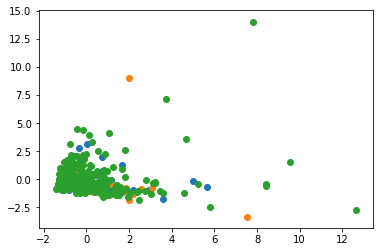

In [511]:
plt.scatter(X[reg_1, 0], X[reg_1, 1])
plt.scatter(X[reg_2, 0], X[reg_2, 1])
plt.scatter(X[reg_3, 0], X[reg_3, 1])
plt.show();

**Regionによる分類は分類できているとは言い難いほど「'Region'=3」となるデータが多すぎる。他方、k-means法による分類は「どちらの特徴量も小さい領域」、「一方の特徴量が大きく他方が小さい領域」、「その逆の領域」の3つに綺麗に分けている。**

### **【問題12】卸売業者にとって有益な情報**

In [433]:
# n_clusters=2のとき
# ラベル1の統計量
labels2_0 = X[pred2 == 0]
df_labels2_0 = pd.DataFrame(labels2_0)
df_labels2_0.describe()

,0,1
count,395.000000,395.000000
mean,-0.418589,0.046426
std,0.737049,1.031943
min,-1.436710,-1.601742
25%,-1.007713,-0.570563
50%,-0.687920,-0.214671
75%,0.037294,0.409435
max,2.014356,9.005487


In [434]:
# n_clusters=2のとき
# ラベル2の統計量
labels2_1 = X[pred2 == 1]
df_labels2_1 = pd.DataFrame(labels2_1)
df_labels2_1.describe()

,0,1
count,45.000000,45.000000
mean,3.674284,-0.407514
std,2.491003,2.702018
min,1.530659,-3.379889
25%,1.996184,-1.251743
50%,2.813497,-0.995326
75%,4.599756,-0.446858
max,12.653002,13.949084


In [444]:
# n_clusters=3のとき
# ラベル0の統計量
labels3_0 = X[pred2 == 0]
df_labels3_0 = pd.DataFrame(labels3_0)
df_labels3_0.describe()

,0,1
count,395.000000,395.000000
mean,-0.418589,0.046426
std,0.737049,1.031943
min,-1.436710,-1.601742
25%,-1.007713,-0.570563
50%,-0.687920,-0.214671
75%,0.037294,0.409435
max,2.014356,9.005487


In [445]:
# n_clusters=3のとき
# ラベル1の統計量
labels3_1 = X[pred2 == 1]
df_labels3_1 = pd.DataFrame(labels3_1)
df_labels3_1.describe()

,0,1
count,45.000000,45.000000
mean,3.674284,-0.407514
std,2.491003,2.702018
min,1.530659,-3.379889
25%,1.996184,-1.251743
50%,2.813497,-0.995326
75%,4.599756,-0.446858
max,12.653002,13.949084


In [446]:
# n_clusters=3のとき
# ラベル2の統計量
labels3_2 = X[pred2 == 2]
df_labels3_2 = pd.DataFrame(labels3_2)
df_labels3_2.describe()

,0,1
count,0.0,0.0
mean,NaN,NaN
std,NaN,NaN
min,NaN,NaN
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN
max,NaN,NaN


**特徴量を一つ一つChannelとRegionごとに見ていく**

In [477]:
df_ch1 = df[df['Channel'] == 1].drop(['Channel'], axis=1)
df_ch2 = df[df['Channel'] == 2].drop(['Channel'], axis=1)

In [460]:
df_region1 = df[df['Region'] == 1].drop(['Region'], axis=1)
df_region2 = df[df['Region'] == 2].drop(['Region'], axis=1)
df_region3 = df[df['Region'] == 3].drop(['Region'], axis=1)

**Fresh**

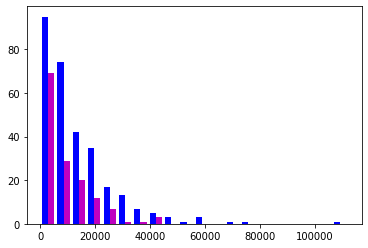

In [475]:
plt.hist([df_ch1['Fresh'], df_ch2['Fresh']], bins=20, label=['Horeca', 'Retail'], color=['b', 'm']);

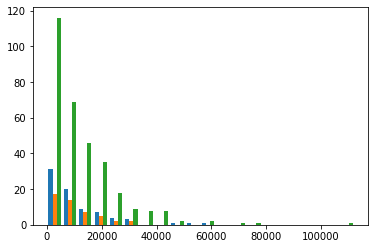

In [463]:
plt.hist([df_region1['Fresh'], df_region2['Fresh'], df_region3['Fresh']], bins=20, 
        label=['Lisbon', 'Oporto', 'Other']);

**Milk**

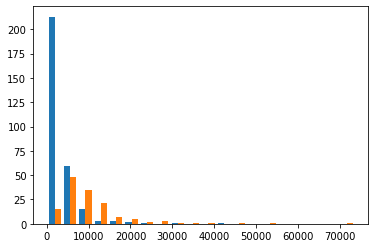

In [465]:
plt.hist([df_ch1['Milk'], df_ch2['Milk']], bins=20, label=['Horeca', 'Retail']);

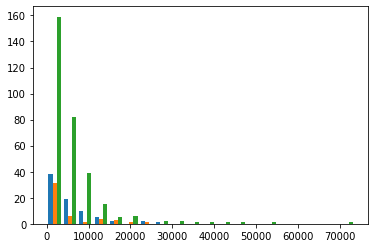

In [466]:
plt.hist([df_region1['Milk'], df_region2['Milk'], df_region3['Milk']], bins=20, 
        label=['Lisbon', 'Oporto', 'Other']);

**Grocery**

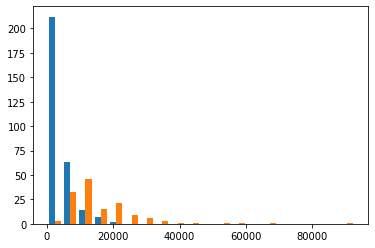

In [467]:
plt.hist([df_ch1['Grocery'], df_ch2['Grocery']], bins=20, label=['Horeca', 'Retail']);

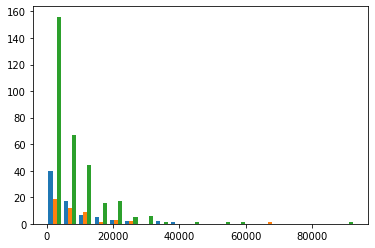

In [468]:
plt.hist([df_region1['Grocery'], df_region2['Grocery'], df_region3['Grocery']], bins=20, 
        label=['Lisbon', 'Oporto', 'Other']);

**Frozen**

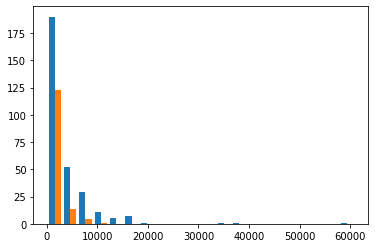

In [469]:
plt.hist([df_ch1['Frozen'], df_ch2['Frozen']], bins=20, label=['Horeca', 'Retail']);

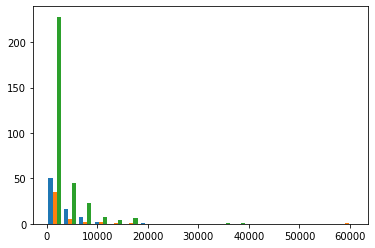

In [470]:
plt.hist([df_region1['Frozen'], df_region2['Frozen'], df_region3['Frozen']], bins=20, 
        label=['Lisbon', 'Oporto', 'Other']);

**Detergents_Paper**

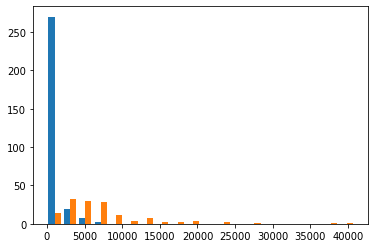

In [471]:
plt.hist([df_ch1['Detergents_Paper'], df_ch2['Detergents_Paper']], bins=20, label=['Horeca', 'Retail']);

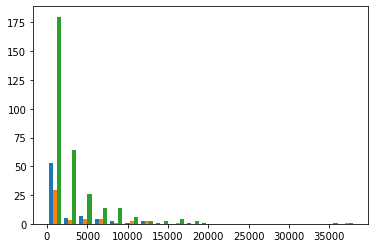

In [472]:
plt.hist([df_region1['Detergents_Paper'], df_region2['Detergents_Paper'], df_region3['Frozen']], bins=20, 
        label=['Lisbon', 'Oporto', 'Other']);

**Delicassen**

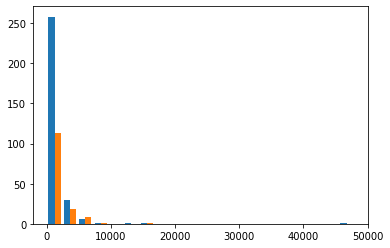

In [473]:
plt.hist([df_ch1['Delicassen'], df_ch2['Delicassen']], bins=20, label=['Horeca', 'Retail']);

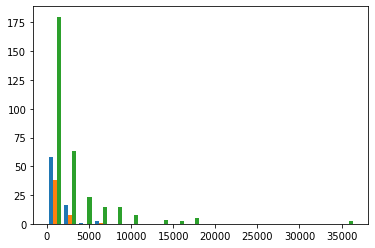

In [474]:
plt.hist([df_region1['Delicassen'], df_region2['Delicassen'], df_region3['Frozen']], bins=20, 
        label=['Lisbon', 'Oporto', 'Other']);

### **まとめ**

In [514]:
df = pd.read_csv('Wholesale customers data.csv')
df = df.drop(['Channel', 'Region'], axis=1)
X = np.array(df)

In [530]:
skmeans_fin = ScratchKMeans(n_clusters=4, n_init=10, max_iter=100)
pred_fin = skmeans_fin.fit(X)
pred_fin

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 1, 0, 2, 2, 2, 0, 1, 0, 0, 0, 0, 0,
       2, 3, 2, 0, 0, 0, 1, 2, 0, 0, 2, 2, 0, 0, 2, 1, 1, 2, 2, 0, 1, 1,
       0, 1, 1, 3, 0, 1, 0, 0, 2, 1, 2, 0, 1, 1, 0, 0, 0, 3, 0, 1, 0, 1,
       0, 2, 0, 0, 0, 1, 0, 2, 0, 2, 0, 1, 0, 0, 0, 1, 0, 2, 0, 3, 3, 2,
       0, 2, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 2, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       2, 0, 0, 0, 0, 3, 1, 3, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 2, 0,
       0, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 2, 0,
       1, 1, 1, 2, 1, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2,
       0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0,

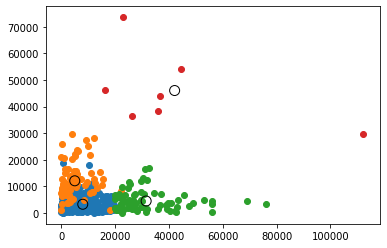

In [531]:
for i in range(4):
    labels_fin = X[pred_fin == i]
    plt.scatter(labels_fin[:, 0], labels_fin[:, 1])
    
centers_fin = skmeans_fin.cluster_centers_
plt.scatter(centers_fin[:, 0], centers_fin[:, 1], s=100, 
           facecolors='none', edgecolors='k')
plt.show();

In [517]:
df['cluster_id'] = pred_fin
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster_id
0,12669,9656,7561,214,2674,1338,0
1,7057,9810,9568,1762,3293,1776,0
2,6353,8808,7684,2405,3516,7844,0
3,13265,1196,4221,6404,507,1788,0
4,22615,5410,7198,3915,1777,5185,2


In [519]:
df['cluster_id'].value_counts()

0    278
1     80
2     75
3      7
Name: cluster_id, dtype: int64

In [520]:
df[df['cluster_id']==0].mean()

Fresh               7983.169065
Milk                3305.223022
Grocery             4193.967626
Frozen              2708.305755
Detergents_Paper    1249.025180
Delicassen          1052.097122
cluster_id             0.000000
dtype: float64

In [521]:
df[df['cluster_id']==1].mean()

Fresh                5007.8250
Milk                12124.6750
Grocery             20096.1125
Frozen               1594.4250
Detergents_Paper     8982.2875
Delicassen           1822.9125
cluster_id              1.0000
dtype: float64

In [522]:
df[df['cluster_id']==2].mean()

Fresh               31538.173333
Milk                 4522.773333
Grocery              5660.666667
Frozen               5329.400000
Detergents_Paper     1076.693333
Delicassen           1963.760000
cluster_id              2.000000
dtype: float64

In [523]:
df[df['cluster_id']==3].mean()

Fresh               42117.285714
Milk                46046.142857
Grocery             42914.285714
Frozen              10211.714286
Detergents_Paper    17327.571429
Delicassen          12192.142857
cluster_id              3.000000
dtype: float64

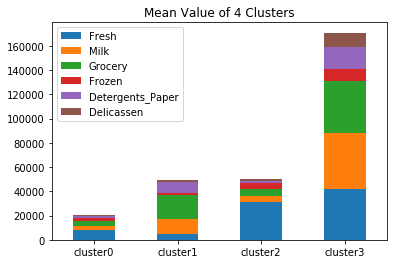

In [527]:
clusterinfo = pd.DataFrame()
for i in range(4):
    clusterinfo['cluster' + str(i)] = df[df['cluster_id'] == i].mean()
clusterinfo = clusterinfo.drop('cluster_id')

my_plot = clusterinfo.T.plot(kind='bar', stacked=True, title='Mean Value of 4 Clusters')
my_plot.set_xticklabels(my_plot.xaxis.get_majorticklabels(), rotation=0);

**cluster0に分類された人は購買額が全体的に低く、cluster3に分類された人は購買額が高い傾向にある。また、各クラスタごとの特徴量の内訳を詳しく見ると、例えばcluster1に分類された人はGrocery(日用品)の購買額が高いことが分かる。また、cluster2に分類された人は、Fresh(生鮮食品)の購買額が高いことを読み取ることができる。以上のことから、卸売業者にとって有益な情報は例えば以下のような提案とすることができる。「cluster3に分類された人にDMを送ると収益が上がるだろう。特に生鮮食品、乳製品、日用品の購買額が高いため、それらを広告するチラシを重点的に送るなどの工夫が取れる。また、cluster2はcluster3に分類された人の数よりもかなり多く、その中でも生鮮食品の購買額が高いので、cluster2の層に生鮮食品のチラシやDMを送るといった方法が効率的であると言える。」**

### **【問題13】（アドバンス課題）他の手法の調査**

## **DBSCAN**
**(Density-based spatial clustering of applications with noise)**

クラスタリングアルゴリズムの一つ

**アルゴリズムの概要**

・点を3つに分類

①Core点: 半径ε以内に少なくともminPts個の隣接点を持つ点

②Reachable点: 半径ε以内にminPts個ほどの隣接点はないが、Core点は含まれる点

③Outlier点: 半径ε以内に隣接点がない点

・Core点の集まりからクラスタを形成し、Reachable点を各クラスタに割り当てる

**メリット**

a) k-meansと違って，最初にクラスタ数を決めなくてよい
 
b) とがったクラスタでも分類できる。クラスタが球状であることを前提としない

c) パラメータがεとminPtsという二つでよい。また，パラメータの範囲も判断しやすい。

**デメリット**

a) border点の概念が微妙で，データによりどのクラスタに属するか変わる可能性がある

b) データが密集していると適切にεとminPtsを決めるのが難しい。ほとんどの点を一つのクラスタに分類してしまう場合も

c) データがわからないとεを決めるのが難しい。

## **PCA以外の次元削減手法**

### **t-SNE**

**メリット**

**デメリット**

a) うまくいくことが保証されているのは2or3次元への圧縮のみ

b) 局所構造が次元の呪いの影響を受けやすい

c) 最適化アルゴリズムの収束性が保証されていない

### **LLE**

**(Locally Linear Embedding)**

**メリット**

a) 次元を縮約することで二次元や三次元の形でデータを可視化できるようになる

**デメリット**

### **【問題14】（アドバンス課題）t-SNEとDBSCANの利用**

In [482]:
import pandas as pd

df = pd.read_csv('Wholesale customers data.csv')
df = df.drop(['Channel', 'Region'], axis=1)
print(df.head())

scaler = StandardScaler()
scaler.fit(df)
df_sc = scaler.transform(df)
X_sc = np.array(df_sc)

   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0  12669  9656     7561     214              2674        1338
1   7057  9810     9568    1762              3293        1776
2   6353  8808     7684    2405              3516        7844
3  13265  1196     4221    6404               507        1788
4  22615  5410     7198    3915              1777        5185


In [485]:
from sklearn.manifold import TSNE
from sklearn.manifold import LocallyLinearEmbedding


tsne = TSNE()
data_tsne = tsne.fit_transform(X_sc)

### **DBSCANの利用**

In [489]:
from sklearn.cluster import DBSCAN

clustering = DBSCAN().fit(X_sc)
pred_db = clustering.labels_

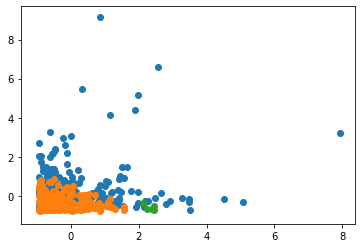

In [504]:
label_m1 = X_sc[pred_db == -1]
label_0 = X_sc[pred_db == 0]
label_1 = X_sc[pred_db == 1]
plt.scatter(label_m1[:, 0], label_m1[:, 1])
plt.scatter(label_0[:, 0], label_0[:, 1])
plt.scatter(label_1[:, 0], label_1[:, 1])
plt.show();

### **t-SNEの利用**

In [506]:
from sklearn.manifold import TSNE

X_sne = TSNE().fit_transform(X_sc)

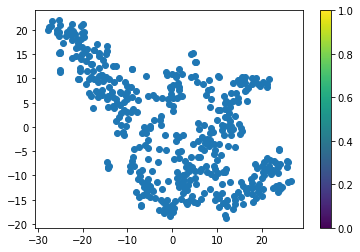

In [508]:
plt.scatter(X_sne[:, 0], X_sne[:, 1])
plt.colorbar();